In [1]:
%env ROS_IP=192.168.0.18
%env ROS_MASTER_URI=http://192.168.0.17:11311

!echo $ROS_IP
!echo $ROS_MASTER_URI






env: ROS_IP=192.168.0.18
env: ROS_MASTER_URI=http://192.168.0.17:11311
192.168.0.18
http://192.168.0.17:11311


In [2]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl

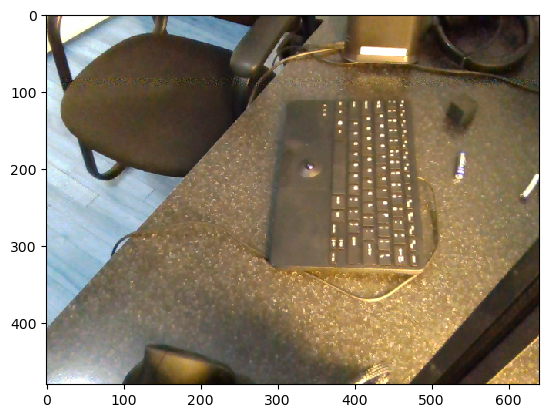

532.6199951171875
1038.3399658203125
1589.7900390625


[ERROR] [1745943316.407427]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943316.477708]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1783.4700927734375
1850.7200927734375


[ERROR] [1745943316.672019]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943316.797381]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1866.8599853515625
1869.550048828125
1869.550048828125


[ERROR] [1745943316.949102]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943317.068071]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1869.550048828125
1869.550048828125
1869.550048828125


[ERROR] [1745943317.509808]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943317.620457]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1869.550048828125
1869.550048828125
1869.550048828125


[ERROR] [1745943317.811115]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943317.897959]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1869.550048828125
1869.550048828125
1869.550048828125


[ERROR] [1745943318.052004]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943318.127494]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1869.550048828125
1869.550048828125
1869.550048828125
1869.550048828125


[ERROR] [1745943318.317356]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943318.392903]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1869.550048828125
1869.550048828125
1869.550048828125
1869.550048828125
1869.550048828125
1869.550048828125


[ERROR] [1745943318.605532]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943318.693419]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1869.550048828125
1869.550048828125
1869.550048828125


[ERROR] [1745943318.858396]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943318.971947]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1869.550048828125
1869.550048828125
1869.550048828125


[ERROR] [1745943319.155808]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943319.220240]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1869.550048828125
1869.550048828125
1869.550048828125


[ERROR] [1745943319.422319]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943319.527301]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1869.550048828125
1869.550048828125
1869.550048828125


[ERROR] [1745943319.697276]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943319.806906]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1869.550048828125
1869.550048828125
1869.550048828125


[ERROR] [1745943319.942847]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943320.043043]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1869.550048828125
1869.550048828125


[ERROR] [1745943320.270529]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943320.434524]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

1869.550048828125
1589.7900390625


[ERROR] [1745943320.549470]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7636a4e38af0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/vscode/ros_ws/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745943320.658767]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmC

In [3]:
cam = LocobotCamera()

img = cam.get_image()
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [4]:
arm_control = LocobotArmControl(use_simulation=False)
# cam = LocobotCamera()
# arm_control.move_arm([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])




[INFO] [1745943287.280037]: Waiting for joint trajectory action on /locobot/arm_controller/follow_joint_trajectory…
[INFO] [1745943287.935194]: Joint‐space action server ready


[ WARN] [1745943289.330925638]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745943289.341527543]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745943289.341657068]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745943289.341722420]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745943289.341817870]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745943289.341878888]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745943289.341960966]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745943289.342017916]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745943289.342086422]: Link 'locobot/ca

[ INFO] [1745943289.345156466]: Loading robot model 'locobot'...
[ INFO] [1745943289.345230344]: No root/virtual joint specified in SRDF. Assuming fixed joint
[ INFO] [1745943292.799524910]: Ready to take commands for planning group interbotix_arm.
[INFO] [1745943293.338861]: LocobotArmControl initialized


In [7]:
arm_control.close_gripper()

[WARN] [1745943315.412469]: ❌ No object detected before fully closed


In [9]:
arm_control.open_gripper()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler

# Create target poses
target_pose = Pose()
target_pose.position.x = 0.3
target_pose.position.y = -0.3
target_pose.position.z = 0.2

# Create a quaternion for (roll=0, pitch=-90°, yaw=0)
q = quaternion_from_euler(0, np.pi/2, 0)
target_pose.orientation.x = q[0]
target_pose.orientation.y = q[1]
target_pose.orientation.z = q[2]
target_pose.orientation.w = q[3]


# Execute the grab sequence
# arm_control.move_gripper(0.1)  # Open gripper
arm_control.go_to_pose(target_pose)  # Move to approach position


True

In [4]:
arm_control.move_gripper(1.0)

header: 
  seq: 200073
  stamp: 
    secs: 1745859426
    nsecs: 208255767
  frame_id: ''
name: 
  - left_wheel_joint
  - right_wheel_joint
  - waist
  - shoulder
  - elbow
  - forearm_roll
  - wrist_angle
  - wrist_rotate
  - gripper
  - left_finger
  - right_finger
  - pan
  - tilt
position: [0.0, 0.0, -0.9602720141410828, 0.36968937516212463, 0.04448544234037399, -0.003067961661145091, 1.2072429656982422, -0.9664078950881958, 0.016873789951205254, 0.019731242209672928, -0.019731242209672928, -0.013805827125906944, 0.17794176936149597]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0]
effort: [0.0, 0.0, -88.77000427246094, -349.70001220703125, -312.0400085449219, 5.380000114440918, 0.0, 0.0, -169.47000122070312, 0.0, 0.0, 0.0, 0.0]
0.0
header: 
  seq: 200076
  stamp: 
    secs: 1745859426
    nsecs: 238274812
  frame_id: ''
name: 
  - left_wheel_joint
  - right_wheel_joint
  - waist
  - shoulder
  - elbow
  - forearm_roll
  - wrist_angle
  - wrist_rotate
  

In [6]:
arm_control.move_gripper(0.5)

header: 
  seq: 204993
  stamp: 
    secs: 1745859475
    nsecs: 408286571
  frame_id: ''
name: 
  - left_wheel_joint
  - right_wheel_joint
  - waist
  - shoulder
  - elbow
  - forearm_roll
  - wrist_angle
  - wrist_rotate
  - gripper
  - left_finger
  - right_finger
  - pan
  - tilt
position: [0.0, 0.0, -0.9602720141410828, 0.36968937516212463, 0.04448544234037399, -0.003067961661145091, 1.2072429656982422, -0.9664078950881958, 0.015339808538556099, 0.019709520041942596, -0.019709520041942596, -0.013805827125906944, 0.17794176936149597]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0]
effort: [0.0, 0.0, -86.08000183105469, -349.70001220703125, -312.0400085449219, 0.0, 0.0, 0.0, -153.3300018310547, 0.0, 0.0, 0.0, 0.0]
0.0
header: 
  seq: 204996
  stamp: 
    secs: 1745859475
    nsecs: 438275337
  frame_id: ''
name: 
  - left_wheel_joint
  - right_wheel_joint
  - waist
  - shoulder
  - elbow
  - forearm_roll
  - wrist_angle
  - wrist_rotate
  - gripper
  - l

In [12]:
cam = LocobotCamera()

In [ ]:
image = cam.get_image()
# print(image)

In [9]:
cam.tilt(1)

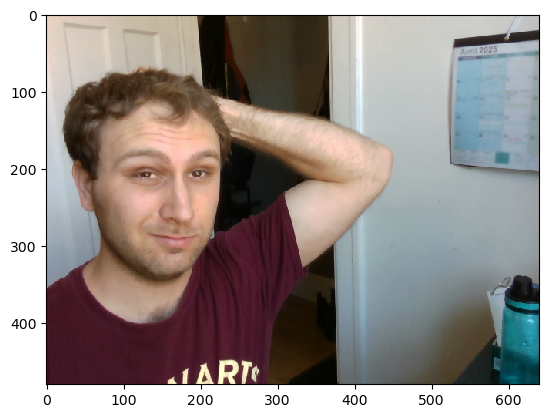

In [18]:

import matplotlib.pyplot as plt

image = cam.get_image()
# convert bgr to rgb
image = image[:, :, ::-1]
plt.imshow(image)
plt.show()